___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

The domain you must have remembered it because you are worked on under project **"EDA for Car Price Prediction Model"**. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will use the data sets prepared for algorithms as a result of the EDA project.

So this study assumes that you are working on the EDA project and that you have sufficient domain knowledge.

Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this case, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression, Random Forest*** and ***XG Boost*** algorithms respectively. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 

## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df=pd.read_pickle("golden_data_dummy.pkl")

In [12]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,1422.0,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,1422.0,66.0,16200,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14990 entries, 0 to 15918
Columns: 136 entries, displacement to type_Used
dtypes: float64(86), int64(5), uint8(45)
memory usage: 11.2 MB


In [21]:
df.columns

Index(['displacement', 'hp', 'km', 'ss_abs', 'ss_adaptive_cruise_control',
       'ss_adaptive_headlights', 'ss_alarm_system', 'ss_blind_spot_monitor',
       'ss_central_door_lock', 'ss_central_door_lock_with_remote_control',
       ...
       'gearing_type_Semi-automatic', 'fuel_diesel', 'fuel_electric',
       'fuel_gasoline', 'fuel_lpg', 'type_Demonstration',
       'type_Employee's car', 'type_New', 'type_Pre-registered', 'type_Used'],
      dtype='object', length=136)

In [16]:
df.describe()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
count,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,...,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000
mean,1432.258843,88.231744,33894.105203,0.949767,0.080187,0.133422,0.126484,0.082188,0.859239,0.155704,...,0.030754,0.471781,0.000133,0.524149,0.003936,0.051634,0.067178,0.054236,0.090127,0.736825
std,271.764876,26.617304,37284.577857,0.218434,0.271591,0.340042,0.332405,0.274660,0.347786,0.362586,...,0.172656,0.499220,0.011550,0.499433,0.062616,0.221295,0.250339,0.226491,0.286373,0.440372
min,890.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1229.000000,66.000000,5000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1461.000000,85.000000,22487.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1598.000000,100.000000,49264.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2967.000000,294.000000,317000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df["price"]

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15913    39950
15915    39885
15916    39875
15917    39700
15918    40999
Name: price, Length: 14990, dtype: int64

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [23]:
X=df.drop("price", axis = 1)

In [25]:
y=df["price"]

In [33]:
df.corr()['price'].sort_values()

age                            -0.458475
gearing_type_Manual            -0.443354
km                             -0.387911
model_Corsa                    -0.379704
type_Used                      -0.333761
                                  ...   
cc_automatic_climate_control    0.415296
model_Espace                    0.437672
ss_led_headlights               0.442480
hp                              0.696620
price                           1.000000
Name: price, Length: 136, dtype: float64

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [28]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()

In [38]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
lm.coef_

array([-7.42757628e-01,  9.13307861e+01, -3.74021499e-02, -4.80139961e+01,
        2.06283750e+01,  2.13086518e+02,  1.16247301e+02, -4.07562760e+02,
       -2.86221719e+02,  4.30174410e+01, -1.88509080e+02, -6.53663640e+01,
       -2.62853458e+02, -4.16145748e+02,  2.53339836e+01, -7.62494719e+02,
       -1.84543352e+02, -3.59075273e+01, -2.05484506e+02, -2.66657575e+02,
       -1.58442191e+02,  5.88124197e+02,  7.94804036e+02,  6.84088475e+02,
        5.80268654e+02, -5.57738794e+02, -5.24397241e+02,  6.82080764e+01,
        1.17193180e+02,  2.13989324e+02, -8.83149317e+00, -3.64609607e+02,
        1.10130011e+02, -1.42060016e+02, -1.60947220e+03, -5.13473662e+02,
        1.00697686e+02,  8.51328191e+02, -1.19696455e+02, -1.62947070e+02,
       -5.02219842e+00,  3.52278469e+02, -1.82583093e+02, -1.33257928e+03,
       -2.04438592e+02,  3.51889010e+02,  5.25437150e+01, -4.92139390e+01,
        4.41807653e+02, -3.18029657e+02, -9.67805683e+00,  2.61002807e+02,
       -9.48890744e+01,  

In [41]:
coef=pd.DataFrame(lm.coef_, X.columns, columns=["Coefficient"])

In [42]:
coef

,Coefficient
displacement,-0.742758
hp,91.330786
km,-0.037402
ss_abs,-48.013996
ss_adaptive_cruise_control,20.628375
...,...
type_Demonstration,1738.585584
type_Employee's car,-1083.444550
type_New,844.291537
type_Pre-registered,-496.377210


In [44]:
lm.intercept_

13477.2735092164

In [45]:
y_pred=lm.predict(X_test)

In [46]:
y_pred

array([18247.6800374 , 21735.00960245, 29980.43257828, ...,
       27397.06570997, 18929.34021788,  7682.02047747])

In [52]:
my_dict = {"Actual": y_test, "Pred":y_pred}

In [53]:
compare=pd.DataFrame(my_dict)

In [54]:
compare.sample(10)

,Actual,Pred
8022,16490,14189.978642
11079,12650,13261.044750
1239,15850,16729.553786
9550,9500,9810.383788
651,12888,11695.507875
5897,13995,15590.622576
8978,7900,7258.635362
4084,19400,20643.526155
5467,24800,22861.100803
5681,25290,23729.934118


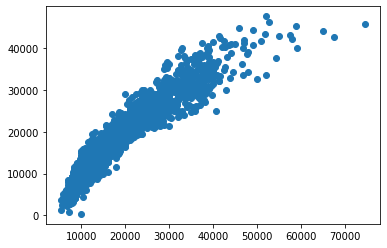

In [47]:
plt.scatter(y_test, y_pred)

In [82]:
from sklearn import metrics

In [83]:
print("MAE:", metrics.mean_absolute_error(y_test,y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score:", lm.score(X_test, y_test))

MAE: 1691.0561021961162
MSE: 6025733.121067095
RMSE: 2454.736874100174
R2 Score: 0.890427062837036


In [84]:
# JOSH NOTE: When I first made this video, I was thinking about how R^2 relates to LinR, which will not fit a line worse than the mean of the y-axis values.
# This is because if the values along the x-axis are truly useless in terms of predicting y-axis values, then the slope of the line used to make predictions will be 0, and the intercept will equal the mean. 
# However, it is possible to simply draw a line that fits the data worse than the mean and get a negative R^2.

In [85]:
# model score with cross validation

In [86]:
from sklearn.model_selection import cross_val_score #Evaluate a score by cross-validation

In [87]:
cv_scores=cross_val_score(estimator=lm, X=X_train, y=y_train, cv=10)

In [88]:
cv_scores

array([0.89733291, 0.8935988 , 0.88827101, 0.8937862 , 0.8871339 ,
       0.88779999, 0.87978772, 0.8908815 , 0.85985585, 0.88419968])

In [89]:
cv_scores.mean()

0.8862647570282652

In [92]:
cv_scores = cross_val_score(estimator=lm, X=X_train, y=y_train, scoring = "neg_mean_squared_error", cv=10)

In [93]:
-cv_scores.mean()

5842730.178340342

In [94]:
np.sqrt(-cv_scores.mean())

2417.1740066326092

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [80]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scaler=StandardScaler()

In [102]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [103]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [104]:
a=pd.DataFrame(X_train, columns=X.columns)

In [105]:
a.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,0.893437,0.448095,-0.542938,0.229726,-0.295182,-0.39125,-0.382623,-0.296135,-2.487365,2.327603,...,-0.177644,1.057800,-0.009763,-1.048742,-0.064892,-0.229266,3.706394,-0.241002,-0.318064,-1.667303
1,-1.599329,-0.119367,-0.903464,0.229726,-0.295182,-0.39125,-0.382623,-0.296135,-2.487365,-0.429626,...,-0.177644,-0.945358,-0.009763,0.953523,-0.064892,-0.229266,-0.269804,-0.241002,-0.318064,0.599771
2,-0.123335,-0.838153,1.467649,0.229726,-0.295182,-0.39125,-0.382623,-0.296135,0.402032,-0.429626,...,-0.177644,-0.945358,-0.009763,0.953523,-0.064892,-0.229266,-0.269804,-0.241002,-0.318064,0.599771
3,0.616511,-0.119367,-0.886398,0.229726,-0.295182,-0.39125,-0.382623,-0.296135,0.402032,-0.429626,...,-0.177644,-0.945358,-0.009763,0.953523,-0.064892,-0.229266,3.706394,-0.241002,-0.318064,-1.667303
4,-1.972952,-0.838153,-0.907838,0.229726,-0.295182,-0.39125,-0.382623,-0.296135,0.402032,-0.429626,...,-0.177644,-0.945358,-0.009763,0.953523,-0.064892,-0.229266,-0.269804,4.149339,-0.318064,-1.667303


In [107]:
rm=Ridge(normalize=False)

In [108]:
rm.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [109]:
y_pred=rm.predict(X_test)

In [110]:
print("MAE:", metrics.mean_absolute_error(y_test,y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score:", rm.score(X_test, y_test))

MAE: 1691.0306393878773
MSE: 6025912.055882858
RMSE: 2454.7733206719636
R2 Score: 0.8904238090564702


In [111]:
cv_scores = cross_val_score(estimator=rm, X=X_train, y=y_train, cv=10)
cv_scores.mean()

0.8862550868056438

In [119]:
# dir(rm)

In [113]:
rm.alpha

1.0

In [129]:
alpha_space=np.linspace(0.1, 20,100)
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [130]:
ridgecv=RidgeCV(alphas=alpha_space, cv=10)

In [131]:
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [132]:
ridgecv.alpha_

20.0

In [133]:
rm=Ridge(alpha=20, normalize=False)
rm.fit(X_train, y_train)
y_pred=rm.predict(X_test)

print("MAE:", metrics.mean_absolute_error(y_test,y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score:", rm.score(X_test, y_test))

MAE: 1690.5898410624977
MSE: 6029397.65905288
RMSE: 2455.483182400743
R2 Score: 0.8903604262664511


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [135]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [137]:
lasm=Lasso()
lasm.fit(X_train, y_train)
y_pred=lasm.predict(X_test)

print("MAE:", metrics.mean_absolute_error(y_test,y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score:", rm.score(X_test, y_test))

MAE: 1690.6237684143957
MSE: 6027750.606879505
RMSE: 2455.1477769941885
R2 Score: 0.8903604262664511


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89728390.15007782, tolerance: 53864179.230890386
  positive)


In [138]:
alpha_space = np.linspace(0.1, 20, 100)
cv_lasm = LassoCV(alphas = alpha_space, cv = 5).fit(X_train, y_train)

cv_lasm.alpha_

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56707546.091918945, tolerance: 53864179.230890386
  positive)


8.14040404040404

In [139]:
lasm=Lasso(alpha=8.1)
lasm.fit(X_train, y_train)
y_pred=lasm.predict(X_test)

print("MAE:", metrics.mean_absolute_error(y_test,y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score:", rm.score(X_test, y_test))

MAE: 1689.0306758684408
MSE: 6052616.126362664
RMSE: 2460.2065210796154
R2 Score: 0.8903604262664511


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56516423.66767883, tolerance: 53864179.230890386
  positive)


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___